In [1]:
# Import libraries necessary for this project

#NumPy - Scientific Computing with Python: http://www.numpy.org/
import numpy as np

#Matplotlib - Python plotting: http://matplotlib.org/
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
#import matplotlib.cm

#SciKit-Image - Image Processing in Python: http://scikit-image.org/
#import skimage.data
#import skimage.filters
#import skimage.io
import skimage.morphology as mph
import skimage.transform as trf
#import skimage.color

#SciKit-Video - Video Processing in Python: http://www.scikit-video.org
import skvideo.io

#Itertools - Efficient Looping in Python: https://docs.python.org/2/library/itertools.html
from itertools import islice



We read an exploratoy video

In [2]:
vid_exp = skvideo.io.vreader('data/processed_videos/video1.avi')

We may access a single frame

In [3]:
img = next(islice(vid_exp, 100, None), None)
img.shape

(240, 320, 3)

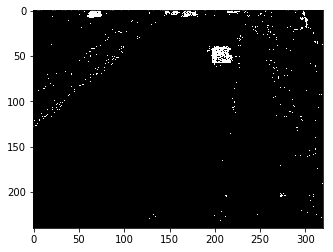

In [4]:
plt.imshow(img)

To improve the quality of the frame and strength the clusters, we apply two `skimage` methods: `erosion` (to erase isolated white points)

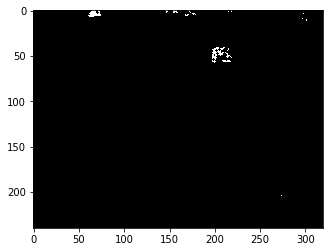

In [5]:
img2 = mph.erosion(img)
plt.imshow(img2)

and `dilation` (to dilate the remaining points)

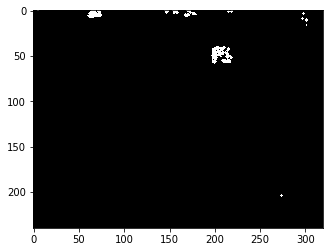

In [6]:
img3 = mph.dilation(img2)
plt.imshow(img3)

With the help of a loop, we write an improved `.avi` file

In [ ]:
writer = skvideo.io.FFmpegWriter('data/improved_videos/video1.avi')
for frame in vid_exp:
    writer.writeFrame(mph.dilation(mph.erosion(frame)))
writer.close()

And now we do the same for our training videos:

In [ ]:
for k in range(9):
    vid_exp = skvideo.io.vreader('data/processed_videos/training' + str(k) +'.avi')
    writer = skvideo.io.FFmpegWriter('data/improved_videos/training' + str(k) +'.avi')
    for frame in vid_exp:
        writer.writeFrame(mph.dilation(mph.erosion(frame)))
    writer.close()
    print(k)

0
1
2
3
